# Logistic Regression Example

## Dataset

This data set is a made up data set about user habits found online.

e.g. here (but I doubt this is the original source)

https://github.com/shoaibb/Logistic-Regression/

## Description of Variables

The dataset contains 1000 observations of 10 variables:

* `Daily Time Spent on Site`: time on site in minutes
* `Age`: age in years
* `Area Income`: avg. income of geographical area of consumer
* `Daily Internet Usage`: avg. minutes a day on the internet
* `Ad Topic Line`: ad topic
* `City`: city
* `Male`: sex (1 = male, 0 = female)
* `Country`: country
* `Timestamp`: time at which consumer clicked on ad or closed window
* `Clicked on Ad`: clicked on ad (1 = clicked, 0 = did not click)

## Problem Statement

The goal is to use logistic regression to predict the probability of a user clicking on an ad based on their age.

We first import the necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
% matplotlib inline

We import the csv file containing the data.

In [2]:
df = pd.read_csv('advertising.csv')

We can quickly check the first five rows of the data using the <code>head</code> method.

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


We now plot whether a user clicked on an ad against the user's age.

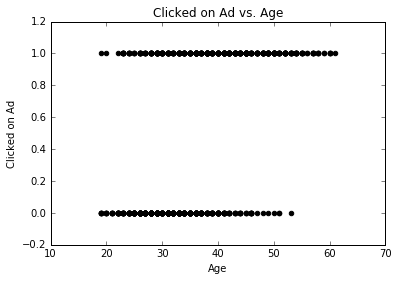

In [4]:
df.plot.scatter(x='Age',y='Clicked on Ad',color='black')
plt.title('Clicked on Ad vs. Age')

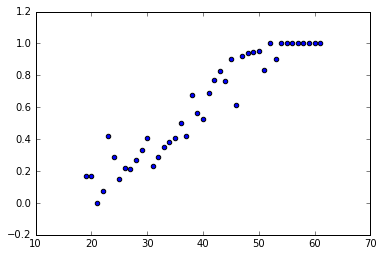

In [5]:
plt.scatter(np.unique(df['Age']), df.groupby(['Age']).mean()['Clicked on Ad'])
    
#This plots age, vs the probability of clicking on the ad

We now fit a logistic regression model to the data. The model has the form $f(X)=\frac{1}{1+e^{-(\beta_0+\beta_1 X)}}$.

In [ ]:
X.shape, y.shape

In [6]:
#This uses only one feature (age)

X = df['Age'].values
y = df['Clicked on Ad'].values

model = LogisticRegression()

scores = cross_val_score(model,X.reshape(-1,1), y, cv=5)
pred = cross_val_predict(model,X.reshape(-1,1), y, cv=5)

In [15]:
from sklearn import metrics
metrics.r2_score(y,pred)

-0.1279999999999999

(array([522.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

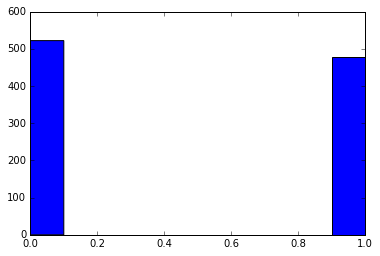

In [7]:
plt.hist(pred) #Logistic regression is really a classification algorithm :/

In [8]:
# If we want to plot the probability from the model explicitly, you can do it in two ways:

#1) Use the "fit" property.

model.fit(X.reshape(-1,1),y) #Note: should do train/test split, just feeling lazy!

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
b0 = model.intercept_
b1 = model.coef_

print(b0,b1)

[-4.55950208] [[0.12836421]]


We save the $\beta_0$, $\beta_1$ values for plotting.

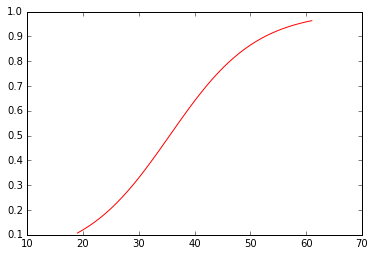

In [10]:
X2 = sorted(X)
plt.plot(X2,1/(1+np.exp(-b0-b1*X2)).reshape(-1,1),'r') #Same formula as the slides! Just do the math.

In [11]:
#2. you can access the "predict_proba" property of the model,which contains the same thing 
# (1st column = probability of 0, 2nd column = probability of 1)

model.predict_proba(X.reshape(-1,1))

array([[0.51668248, 0.48331752],
       [0.64111608, 0.35888392],
       [0.77242105, 0.22757895],
       ...,
       [0.12056691, 0.87943309],
       [0.89288761, 0.10711239],
       [0.77242105, 0.22757895]])

We now plot the previous dataset set with our model. Note that we sort the array <code>X</code> by age so that we can draw $f(X)$ as a continuous curve.

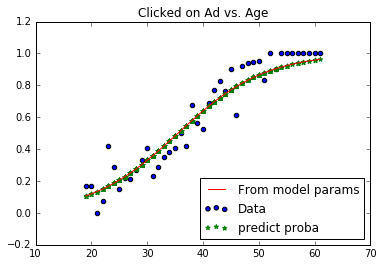

In [12]:
X2 = sorted(X) #just for plotting purposes
plt.scatter(np.unique(df['Age']), df.groupby(['Age']).mean()['Clicked on Ad'],label = 'Data')
plt.scatter(X.reshape(-1,1),model.predict_proba(X.reshape(-1,1))[:,1], marker = '*', color = 'g',label = 'predict proba')
plt.plot(X2,1/(1+np.exp(-b0-b1*X2)).reshape(-1,1),'r', label = 'From model params')
plt.title('Clicked on Ad vs. Age')
plt.legend(loc='lower right');

Note: Computing the age that gives a 50% probability of clicking on an ad.

In [13]:
-b0/b1

array([[35.52004145]])

In [14]:
#You can see that the model predicts 0 if prob < 0.5 and 1 if prob > 0.5!

for a,b in zip(X.reshape(-1,1),model.predict(X.reshape(-1,1))):
    print(a,b)

[35] 0
[31] 0
[26] 0
[29] 0
[35] 0
[23] 0
[33] 0
[48] 1
[30] 0
[20] 0
[49] 1
[37] 1
[48] 1
[24] 0
[33] 0
[23] 0
[37] 1
[41] 1
[36] 1
[40] 1
[30] 0
[35] 0
[52] 1
[36] 1
[41] 1
[28] 0
[28] 0
[52] 1
[34] 0
[22] 0
[35] 0
[28] 0
[57] 1
[23] 0
[57] 1
[30] 0
[53] 1
[39] 1
[46] 1
[39] 1
[29] 0
[30] 0
[32] 0
[31] 0
[25] 0
[52] 1
[20] 0
[43] 1
[37] 1
[46] 1
[23] 0
[28] 0
[45] 1
[50] 1
[47] 1
[31] 0
[36] 1
[49] 1
[29] 0
[41] 1
[27] 0
[34] 0
[29] 0
[32] 0
[45] 1
[29] 0
[40] 1
[32] 0
[25] 0
[34] 0
[31] 0
[46] 1
[39] 1
[43] 1
[42] 1
[22] 0
[35] 0
[33] 0
[38] 1
[45] 1
[27] 0
[28] 0
[38] 1
[54] 1
[31] 0
[41] 1
[36] 1
[34] 0
[34] 0
[37] 1
[43] 1
[24] 0
[26] 0
[40] 1
[31] 0
[26] 0
[36] 1
[41] 1
[46] 1
[34] 0
[53] 1
[23] 0
[40] 1
[21] 0
[20] 0
[40] 1
[25] 0
[42] 1
[30] 0
[32] 0
[60] 1
[53] 1
[22] 0
[46] 1
[32] 0
[31] 0
[55] 1
[42] 1
[50] 1
[45] 1
[31] 0
[26] 0
[27] 0
[36] 1
[43] 1
[31] 0
[44] 1
[45] 1
[27] 0
[37] 1
[50] 1
[36] 1
[36] 1
[29] 0
[47] 1
[39] 1
[36] 1
[38] 1
[23] 0
[38] 1
[31] 0
[30] 0
[44] 1

In [16]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [17]:
from sklearn import metrics
scores = cross_val_score(model,df[['Age','Daily Time Spent on Site','Daily Internet Usage']], y, cv=5)
pred = cross_val_predict(model,df[['Age','Daily Time Spent on Site','Daily Internet Usage']], y, cv=5)
metrics.r2_score(y,pred)

0.78

In [18]:
np.corrcoef(y,pred)

array([[1.        , 0.89111459],
       [0.89111459, 1.        ]])